# Import dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import pprint
import seaborn as sns

# Question 1: Rainfall mean, std, max and min

In [58]:
df = pd.read_csv("/content/rainfall-monthly-total.csv")
pprint.pprint(df)
# Check for null values, proceed only when false
df.isnull().values.any()

       month  total_rainfall
0    1982-01           107.1
1    1982-02            27.8
2    1982-03           160.8
3    1982-04           157.0
4    1982-05           102.2
..       ...             ...
459  2020-04           188.0
460  2020-05           255.6
461  2020-06           233.8
462  2020-07           140.8
463  2020-08           103.4

[464 rows x 2 columns]


False

In [131]:
meanRainfall = np.mean(df['total_rainfall'])
stdRainfall = np.std(df['total_rainfall'])
maxRainfall = np.max(df['total_rainfall'])
minRainfall = np.min(df['total_rainfall'])
print('The mean rainfall of from (Jan 1982 - August 2020) is', meanRainfall)
print('The standard deviation of rainfall from (Jan 1982 - August 2020) is', stdRainfall)
print('The maximum rainfall from (Jan 1982 - August 2020) is', maxRainfall)
print('The minimum rainfall from (Jan 1982 - August 2020) is', minRainfall)

The mean rainfall of from (Jan 1982 - August 2020) is 176.0032327586209
The standard deviation of rainfall from (Jan 1982 - August 2020) is 112.99228388698732
The maximum rainfall from (Jan 1982 - August 2020) is 765.9
The minimum rainfall from (Jan 1982 - August 2020) is 0.2


# Question 2: Boolean Indexing for rainfall > mean

In [ ]:
# Boolean indexing method
df['boolean_index'] = np.ones(len(df))
for i in range(len(df)):
  if df['total_rainfall'][i] > meanRainfall:
    df['boolean_index'][i] = True
  else:
    df['boolean_index'][i] = False

criterion = df['boolean_index'].map(lambda x: x == 1)
pprint.pprint(df[criterion])

# Faster method (1 line)
criterion2 = df['total_rainfall'].map(lambda x: x > meanRainfall)
#pprint.pprint(df[criterion2])
print('Out of 464 months of data, only',len(df[criterion]),'data points have a higher total_rainfall than the mean rainfall for the entire period')

# Question 3: Humidity Histogram

In [60]:
dfHumidity = pd.read_csv('/content/relative-humidity-monthly-mean.csv')
# Check for null values in data set
print(dfHumidity.isnull().values.any())
pprint.pprint(dfHumidity)

False
       month  mean_rh
0    1982-01     81.2
1    1982-02     79.5
2    1982-03     82.3
3    1982-04     85.9
4    1982-05     83.2
..       ...      ...
459  2020-04     76.4
460  2020-05     79.1
461  2020-06     80.2
462  2020-07     78.2
463  2020-08     76.8

[464 rows x 2 columns]


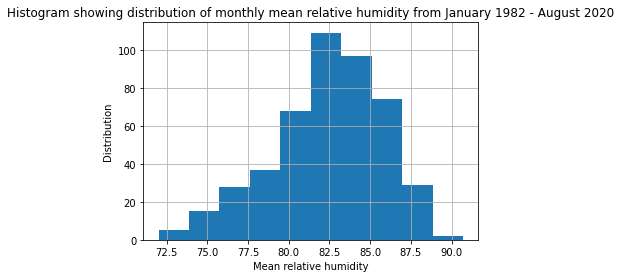

In [64]:
hist = dfHumidity.hist()
plt.xlabel('Mean relative humidity')
plt.ylabel('Distribution')
plt.title('Histogram showing distribution of monthly mean relative humidity from January 1982 - August 2020')
plt.show()

# Question 4: Scatter plot of rainfall vs. humidity

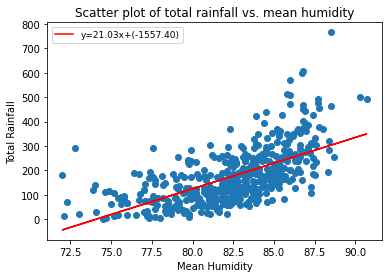

The y intercept is -1557.4033247424454
The gradient is 21.026643208253137


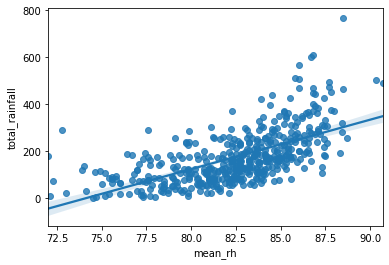

In [136]:
def scatterplot(rainfall,humidity):
  plt.scatter(humidity,rainfall)
  plt.xlabel('Mean Humidity')
  plt.ylabel('Total Rainfall')
  plt.title('Scatter plot of total rainfall vs. mean humidity')
  m, c = np.polyfit(humidity, rainfall, 1) # Slope and Intercept
  plt.plot(humidity, m*humidity+c,'red',label='y={:.2f}x+({:.2f})'.format(m,c))
  plt.legend(fontsize=9)
  plt.show()
  return(print('The y intercept is',c), print('The gradient is',m))

rainfall = df['total_rainfall']
humidity = dfHumidity['mean_rh']
scatterplot(rainfall,humidity)

# OR we can just use seaborn package
sns.regplot(humidity,rainfall)

# Question 5: Fourth order Runge-kutta method to solve differential rate equation

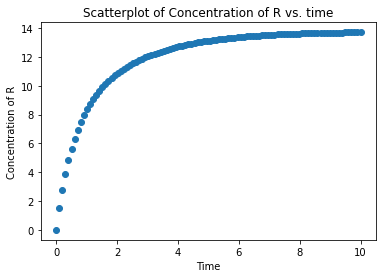

        Time  Concentration of R
0    0.00000            0.000000
1    0.10101            1.511057
2    0.20202            2.794333
3    0.30303            3.889144
4    0.40404            4.827727
..       ...                 ...
95   9.59596           13.692790
96   9.69697           13.696055
97   9.79798           13.699163
98   9.89899           13.702120
99  10.00000           13.704934

[100 rows x 2 columns]


In [130]:
def differentialEqn(t,Cr,k1,Ca0,k2):
  return k1*Ca0*np.exp(-k1*t)-(k2*Cr)

def RKrateEquation(Ca0,h,tf):
  t = np.linspace(0,10,int((10//h)+1))
  y = np.zeros(len(t))
  for i in range(0,len(t)-1):
    k1 = 2
    k2 = 1
    k3 = h*differentialEqn(t[i]+h*0.5, y[i]+h*0.5,k1,Ca0,k2)
    k4 = h*differentialEqn(t[i]+h, y[i]+k3,k1,Ca0,k2)
    y[i+1] = y[i]+(k1/6)+(k2/3)+(k3/3)+(k4/6)
  plt.scatter(t,y)
  plt.title('Scatterplot of Concentration of R vs. time')
  plt.xlabel('Time')
  plt.ylabel('Concentration of R')
  plt.show()
  df = pd.DataFrame()
  df['Time'] = t
  df['Concentration of R'] = y
  return pprint.pprint(df)

# Since it is assumed that k1 = 2, we can choose step size h to be 0.1
RKrateEquation(10,0.1,10)